## `Laboratorio #9`
### Estudiante: Roy Esteban Padilla Calderón
### Carné: B85854

`Imports del código`

In [79]:
from PIL import Image   # carga de las imágenes
import numpy as np      # operaciones de arrays
from math import dist, sqrt, prod   # distancia euclideana
import random # selección aleatoria de puntos
from scipy.spatial.distance import cityblock # medida de distancia manhattan
import numpy as np # operaciones con arreglos
import matplotlib.pyplot as plt # Graficación de imágenes y paleta de colores
from mpl_toolkits.axes_grid1 import ImageGrid # grid para acoplar la paleta de colores

1. `Método de carga load_image(filename, resize)`
 que se encarga de cargar el archivo de imagen con nombre filename, cambia su tamaño al tamaño resize y la retorna como un arreglo multinivel de numpy.

In [80]:
def load_image(filename, resize):
    return np.asarray(Image.open(filename).resize(resize))

In [81]:
images = []
for index in range(3):
    images.append(load_image('images/{}.jpg'.format(index + 1), (128, 128)))
    Image.fromarray(images[-1]).show()

2. `Método de cálculo de distancias euclidianas euclidean_distance(p1, p2)`
 que recibe dos puntos p1 y p2, y retorna la distancia euclidiana entre ellos. Asuma que los puntos pueden ser n-dimensionales.

In [82]:
def euclidean_distance(p1, p2):
    return sqrt(np.sum((p2 - p1)**2))


def library_euclidean_distance(p1, p2):
    return dist(p1, p2)

In [83]:
print(euclidean_distance(np.array([32, 12, 53]), np.array([32,43,2])))
library_euclidean_distance([32, 12, 53], [32,43,2])

59.682493245507096


59.682493245507096

3. `Método de cálculo de distancias de Manhattan manhattan_distance(p1, p2)`
 que recibe dos puntos p1 y p2, y retorna la distancia Manhattan entre ellos. La distancia Manhattan se calcula como la suma de las diferencias absolutas en cada una de las dimensiones para los puntos. Asuma que los puntos pueden ser n-dimensionales.

In [84]:
def manhattan_distance(p1, p2):
    return np.sum(abs(p2 - p1))

def library_manhattan_distance(p1, p2):
    return cityblock(p1, p2)

In [85]:
manhattan_distance(np.array([32, 12, 53]), np.array([32,43,2]))
library_manhattan_distance(np.array([32, 12, 53]), np.array([32,43,2]))

82

4. `Método de selección de centroides nearest_centroid(point, centroids, distance)` 
que recibe un punto point, la lista de centroides actuales centroids y una función distance(p1, p2) que calcula la distancia entre dos puntos. Esta función retorna una tupla (idx_centroid, distance) con el índice del centroide más cercano
y su distancia respectiva. 

    a. Note que debe implementar su función de manera que funcione en un problema en que los datos pueden tener n dimensiones, no necesariamente 3.

In [96]:
def nearest_centroid(point, centroids, distance):
    idx_centroid = 0
    min_distance = distance(point, centroids[0])
    for idx in range(len(centroids) - 1):
        if distance(point, centroids[idx + 1]) < min_distance:
            min_distance = distance(point, centroids[idx + 1])
            idx_centroid = idx + 1
                    
    return idx_centroid, min_distance

In [97]:
point = np.array([1 , 2, 3])
centroids = np.array([[3.5, 1.1, 32], [343.5, 11.1, 332]])

nearest_centroid(point, centroids, manhattan_distance)

(0, 32.4)

5. `Método lloyd(data, k, iters, type, distance)` 
que recibe un conjunto de datos n-dimensionales data, un entero positivo k que especifica la cantidad de clusters en los
que se desea agrupar la información, un entero positivo iters que especifica la cantidad de iteraciones del ciclo a ejecutar, una hilera type que puede ser “means” o “mediods” y una hilera distance que puede ser “euclidean” o “manhattan”. Debe implementar el algoritmo de Lloyd de manera que inicialice los puntos de manera aleatoria y luego ejecuta las iteraciones adecuadas del ciclo. Dependiendo del tipo deberá ejecutar el algoritmo como K-means o K-mediods, y deberá utilizar la función de
distancia elegida por el usuario. Retorne los centroides obtenidos al final de la ejecución, así como el “error” total de dicho clustering (puede calcularlo como la suma de distancias o la suma de distancias cuadradas).

`Nota:` Se utilizan las fórmulas de las librerías de las funciones de distancia para incrementar la velocidad de los cálculos.

In [88]:
def k_means(clusters : dict):
    '''Método para ejecutar el algoritmo de k means generando así los nuevos centroides'''
    new_centroids = []
    for centroid in clusters.keys():
        if len(clusters[centroid]) > 0:
            new_centroids.append(np.mean(clusters[centroid], axis = 0))
        else:
             new_centroids.append(centroid)

    return new_centroids

def k_mediods(clusters : dict, distance):
    '''Método para ejecutar el algoritmo de k mediods generando así los nuevos centroides'''
    new_centroids = []
    for centroid in clusters.keys():
        minimum_sum = get_sum(centroid, clusters[centroid], distance)
        minimum_centroid = centroid
        # Prueba de suma con los demás puntos del cluster
        for point in clusters[centroid]:
            _sum = sum( distance(point, point_value) for point_value in (clusters[centroid]+ [centroid]))
            
            if _sum < minimum_sum:
                minimum_sum = _sum
                minimum_centroid = point
        new_centroids.append(minimum_centroid)
        
    return new_centroids

def get_sum( point, points, distance):
    '''Método para calcular la suma de las distancias entre un punto y los otros puntos'''
    _sum = 0
    for point_value in points:
        _sum += distance(point, point_value)
    return _sum

def lloyd(data : np.ndarray, k : int, iters : int, type, distance):
    '''
    data = datos
    k = cantidad de clusters
    iters = cantidad de iteraciones
    type = means p mediods
    distance = euclidean o manhattan
    '''
    # 1. Determine k puntos centrales iniciales
    distance = library_euclidean_distance if distance == "euclidean" else library_manhattan_distance
    error = 0
    shape = data.shape
    data = data.reshape(prod(shape[:-1]), shape[-1]).astype(float)
    initial_centroids = random.choices(data, k=k)

    centroids = {tuple(key): [] for key in initial_centroids}

    # 2. Itere sobre los siguientes pasos:
    for i in range(iters):
        # a. Asigne cada punto a su centro más cercano
        error = 0
        for point in data:
            # Cercania con los centroides
            centroids_list = list(centroids.keys())
            idx_centroid, min_distance = nearest_centroid(point, centroids_list, distance)
            error += min_distance
            
            centroids[centroids_list[idx_centroid]].append(point)
        # b. Calcule nuevos centros con k-means/k-medios
        keys = []
        if type == "means":
            keys = k_means(centroids)
        else:
            keys = k_mediods(centroids, distance)
            
        centroids = {tuple(key): [] for key in keys}
    
    return list(centroids.keys()), error

Impresión del color RGB:

In [89]:
def print_image(arr, title):
    '''Método de impresión de imágenes'''
    plt.imshow(arr)
    plt.title(title, fontsize=9)
    plt.axis('off')
    plt.pause(0.001) # Para que no se imprima al final todo


6. `Pruebas del algoritmo:`

In [90]:
# Variables para la ejecución
types = ['means', 'mediods']
distances = ['euclidean', 'manhattan']
k_samples = 5

In [91]:
def run_algorithm(image, types : list, distances : list, k_samples : int, iters : int):
    '''Método para correr el algoritmo con las combinaciones de hiperparámetros e imprimir las paletas con la imagen'''
    centroids_dict = {}
    titles = []
    key = 0
    for type in types:
        for distance in distances:
            centroids, error = lloyd(image, k_samples, iters, type, distance)
            centroids_dict[key] = centroids
            titles.append('Error con {} y {} : {}'.format(type, distance, np.around(error, 5)))
            key +=1
    print_palette(centroids_dict, titles, image)
    

def print_palette (centroids_dict, titles, image):
    '''Método de impresión de la paleta de la imagen'''
    print_image(image, '')
    for key in centroids_dict.keys():
        fig = plt.figure(figsize=(4., 1.))
        grid = ImageGrid(fig, 111, nrows_ncols=(1, 5), axes_pad=0.2)
        
        for ax, centroid in zip(grid, centroids_dict[key]):
            # Dimensiones de la imagen
            height, width, channel = 1, 1, 3
            # Seteo del color
            red, green, blue = centroid[0], centroid[1], centroid[2]
            # Obtención de la imagen como un array
            arr = np.full((height, width, channel), [red, green, blue], dtype=('uint8'))
            ax.imshow(arr)
            ax.axis('off')
        fig.suptitle(titles[key])

Resultado con la imagen 1

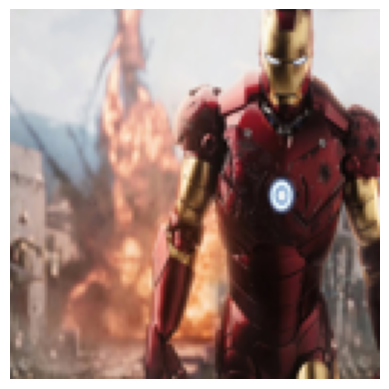

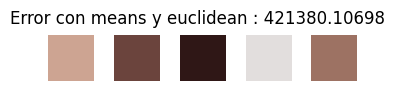

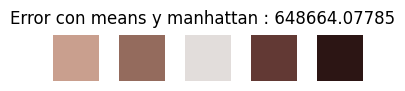

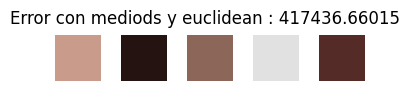

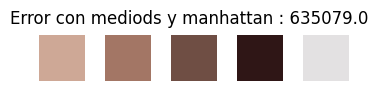

In [93]:
run_algorithm(images[0], types, distances, 5, 15)

Resultado con la imagen 2:

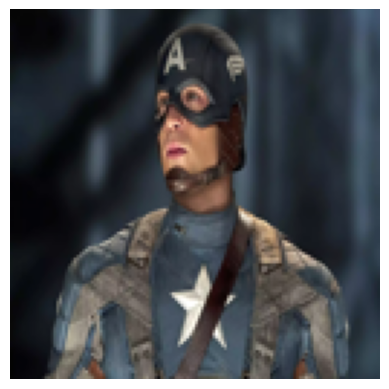

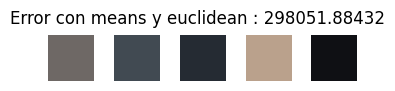

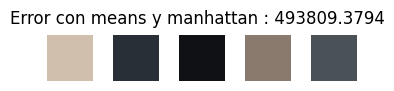

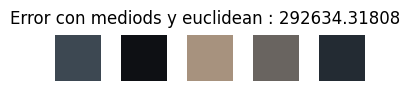

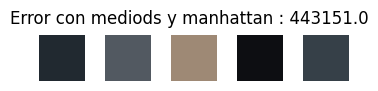

In [94]:
run_algorithm(images[1], types, distances, 5, 15)

Resultado con la imagen 3:

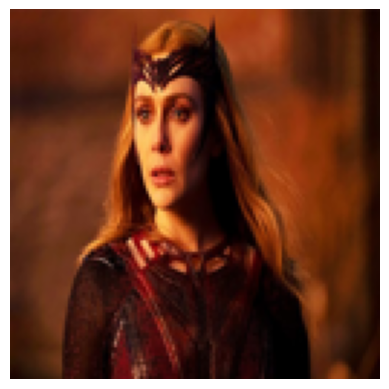

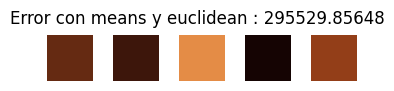

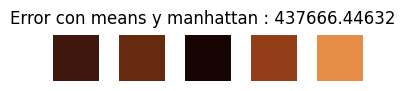

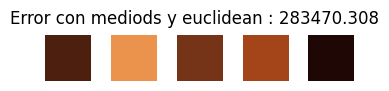

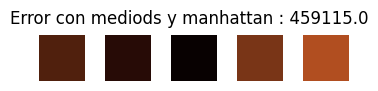

In [95]:
run_algorithm(images[2], types, distances, 5, 15)

## Análisis de los resultados
Como se puede observar en los errores de la paleta de colores de cada una de las tres imágenes anteriores, la combinación que arrojó mejores resultados fue la de utilizar como algoritmo el `k-mediods` con la medida de distancia `euclideana`, aun así comparando las paletas de colores de cada imagen se nota que los colores a los que converge en las cuatro combinaciones es prácticamente el mismo con lo cual en el caso de estas pruebas, de quedarse con una combinación sería con la de `k-means` con la medida de distancia `euclideana` , esto porque como se ha visto en clase y en las ejecuciones utilizar`k-mediods` trae consigo tiempos de ejecución bastante más altos, ya que requiere realizar múltiples cálculos en las sumas de las distancias para encontrar al centroide que permite minimizar la distancia con los demás elementos de tal clúster. Además de esto, la diferencia en cuanto al error provocado no es tan grande en comparación con los demás valores de error de las otras soluciones, aunque sea de miles, tomando en cuenta la escala de dichos valores de error no es tanta la diferencia.